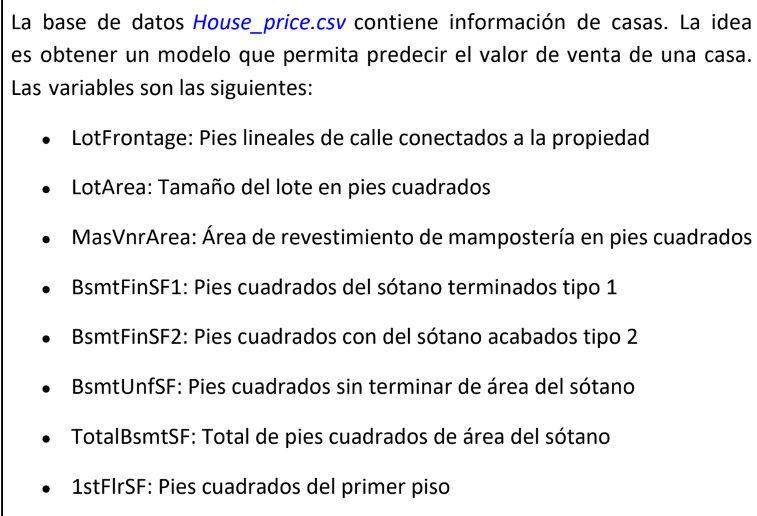

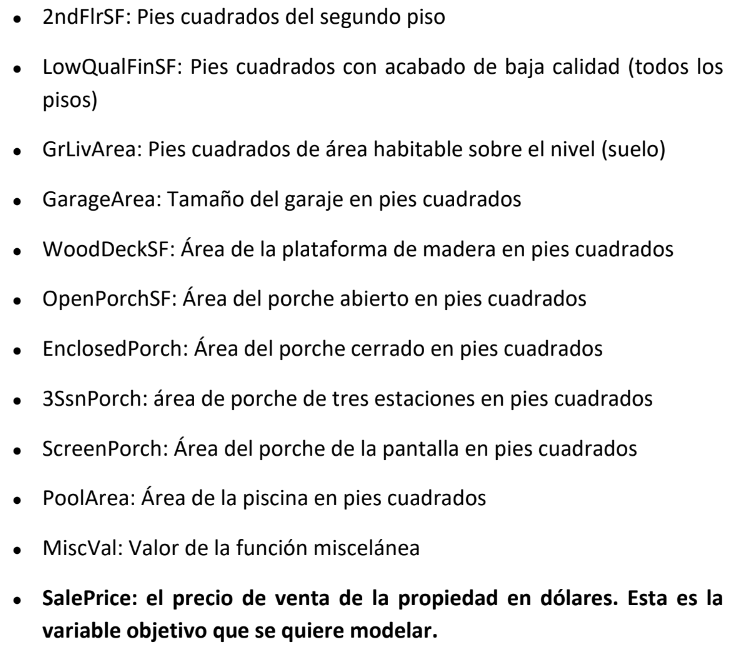

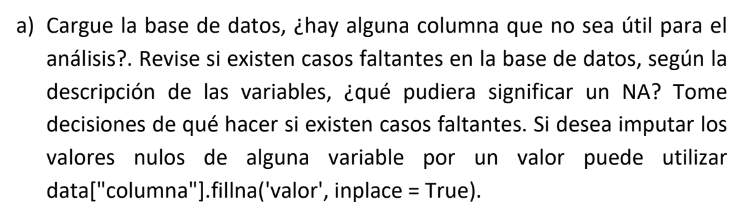

In [1]:
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler # para estandarizar las variables
from sklearn.decomposition import PCA # para realizar el PCA y reducir las dimensiones

In [2]:
# importar House_price.csv
df = pd.read_csv('House_price.csv',sep = ';')
df

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,0,0,953,953,953,694,...,1647,460,0,40,0,0,0,0,0,175000
1456,1457,85.0,13175,119.0,790,163,589,1542,2073,0,...,2073,500,349,0,0,0,0,0,0,210000
1457,1458,66.0,9042,0.0,275,0,877,1152,1188,1152,...,2340,252,0,60,0,0,0,0,2500,266500
1458,1459,68.0,9717,0.0,49,1029,0,1078,1078,0,...,1078,240,366,0,112,0,0,0,0,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  GarageArea     1460 non-null   int64  
 13  WoodDeckSF     1460 non-null   int64  
 14  OpenPorchSF    1460 non-null   int64  
 15  EnclosedPorch  1460 non-null   int64  
 16  3SsnPorch      1460 non-null   int64  
 17  ScreenPorch    1460 non-null   int64  
 18  PoolArea

In [4]:
df.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [5]:
# ver datos faltantes
df.isnull().sum()

Id                 0
LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
dtype: int64

In [6]:
# Llenar datos faltantes con la media de la columna
df["LotFrontage"].fillna(df["LotFrontage"].mean() , inplace = True)
df["MasVnrArea"].fillna(df["MasVnrArea"].mean() , inplace = True)

In [7]:
df.isnull().sum()

Id               0
LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
SalePrice        0
dtype: int64

In [8]:
# Se modificó el set de datos en aquellas columnas que tenian datos faltantes, siendo reemplazados estos datos por el promedio de los valores de la columna respectiva.
# Por lo que el dataset ya no tiene datos faltantes.

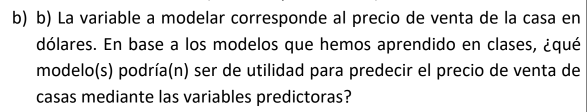

In [9]:
# Nos sirven los modelos de regresión como regresión lineal múltiple, random forest, regresión logistica, regresión polinomial, 
# arbol de decisión, etc.

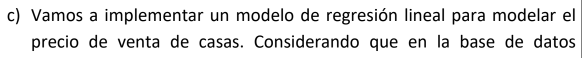

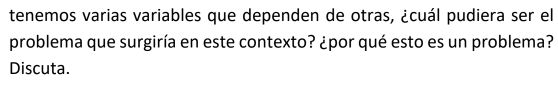

In [10]:
# Al haber muchas variables en el set de datos, puede existir multicolinealidad entre los regresores del modelo por lo que al realizar
# entrenemientos en los modelos de regresión se puede presentar un sobreajuste. Esto se puede solucionar eliminando o descartando variables que tengan
# mucha dependencia entre ellas.

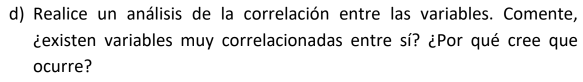

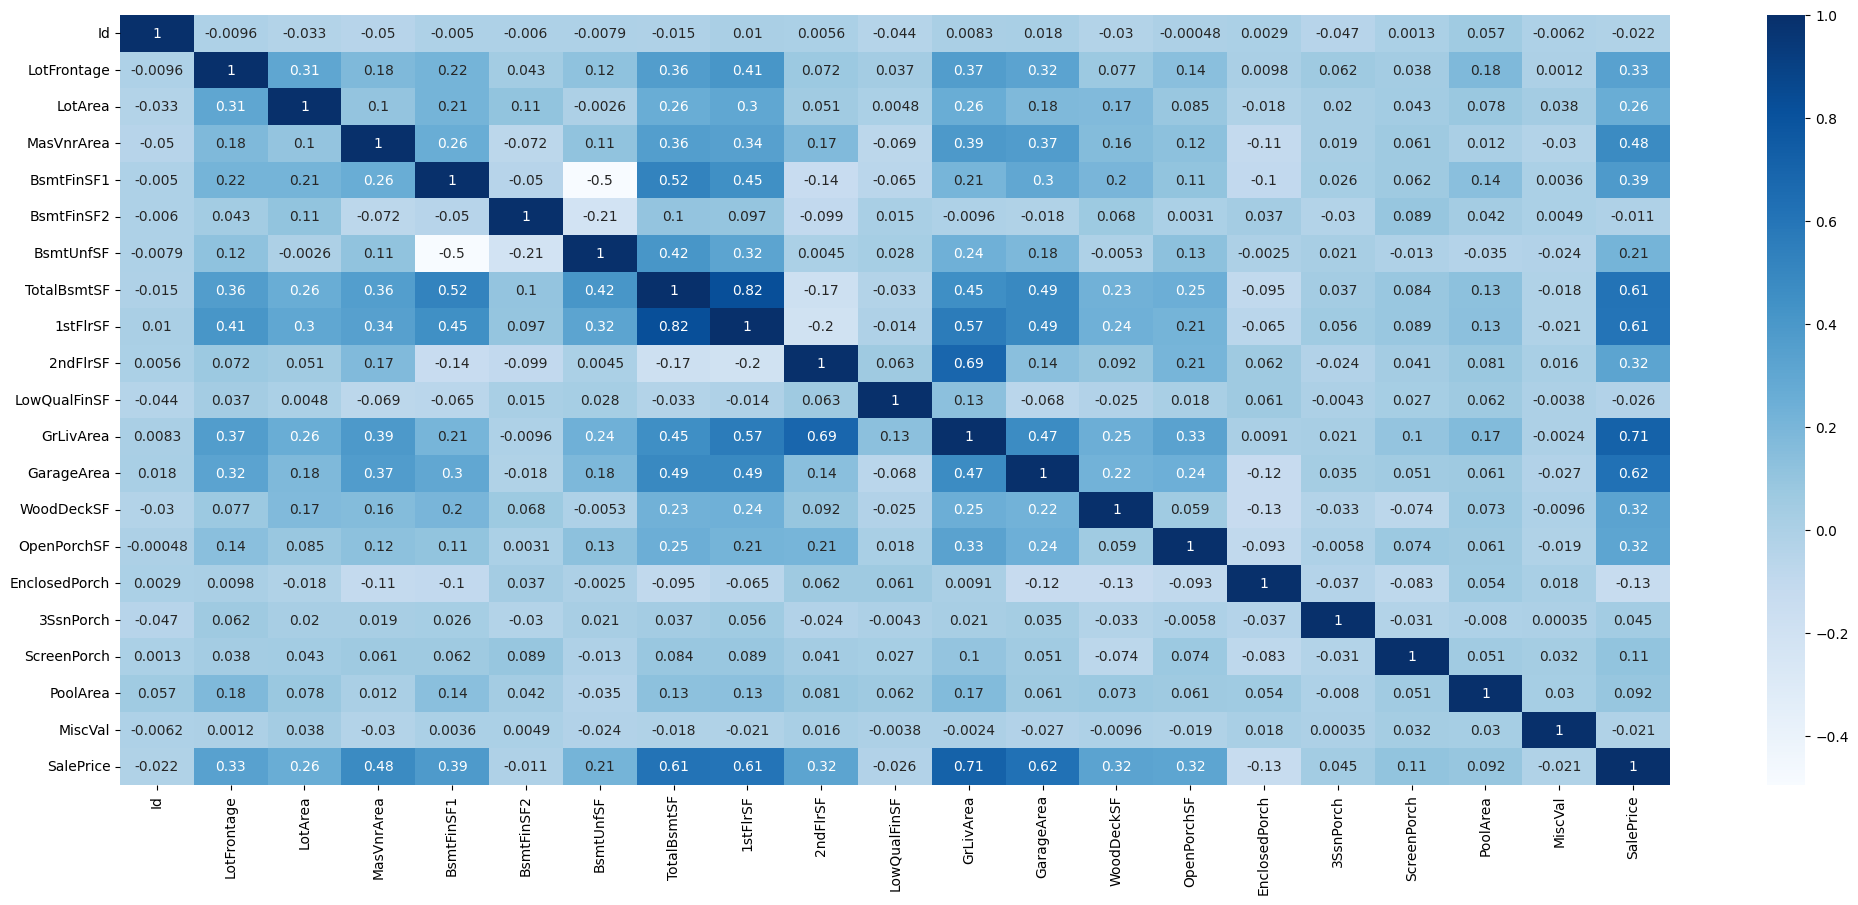

In [11]:
# obtener matriz de correlación y graficarla con heatmap 
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (25,10))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'Blues')
plt.show()

In [12]:
# De las variables seleccionadas se puede ver que el TotalBsmtSF se correlaciona bastante con 1stFlrSF (82%) esto se debe a que ambas variables refieren a áreas del sótano 
# Tambien la variable GrLivArea se correlaciona en un 69% con 2ndFlrSF, esto se debe a que ambas variables refieren a áreas del segundo piso de la casa, en el caso
# de GrLivArea refiere al área sobre el nivel del suelo, por ende pueden ser variables que están bastante correlacionadas entre sí

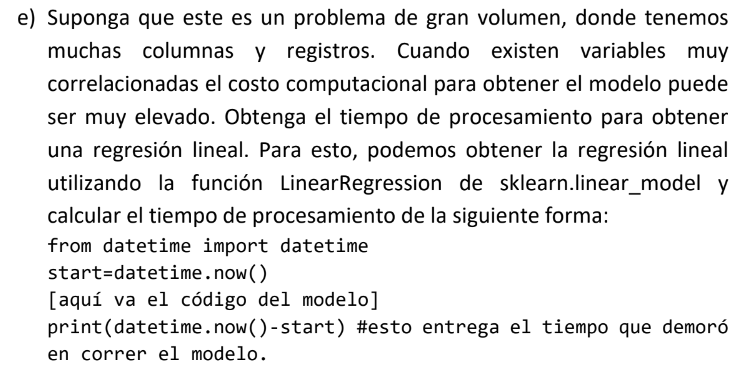

In [13]:
# generar modelo de regresión lineal múltiple y entrenarlo
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis = 1), df['SalePrice'], test_size = 0.2, random_state = 42)

In [14]:
# Empezar cronometro
start=datetime.now()

In [15]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

LinearRegression()

In [16]:
# finalizar cronometro
tiempo_ejecucion = datetime.now()-start #esto entrega el tiempo que demoró en correr el modelo.
print("Tiempo de ejecución: ", tiempo_ejecucion)

Tiempo de ejecución:  0:00:00.092878


In [17]:
# predecir valores de test
y_pred = regresion_lineal.predict(X_test)

# calcular r2 y MSE
print('r2: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))


r2:  0.7575112690718111
MSE:  1859967667.7860348


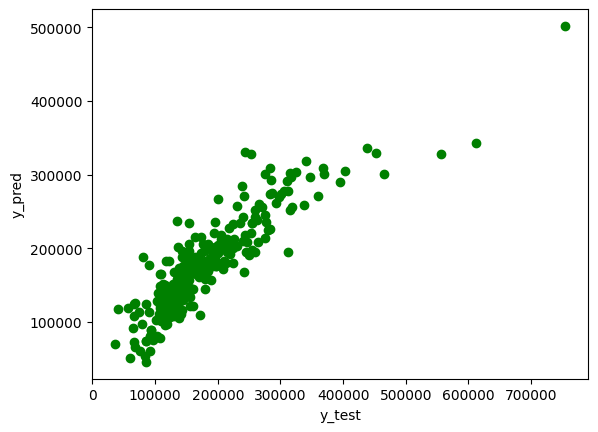

In [18]:
# graficar y_test vs y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

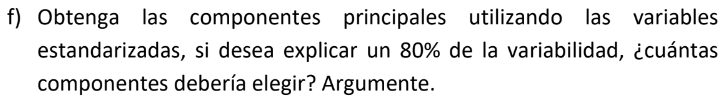

In [19]:
# estandarizar variables con StandardScaler
scaler = StandardScaler()
df_estandarizado = scaler.fit_transform(df.drop('SalePrice', axis = 1)) # se hace drop de la variable explciada para estandarizar las demás variables

# obtener componentes principales con PCA
pca = PCA(n_components = 0.8)
pca.fit(df_estandarizado)

print('Número de componentes: ', pca.n_components_)
print('Varianza explicada: ', pca.explained_variance_ratio_)
print('Varianza explicada acumulada: ', pca.explained_variance_ratio_.cumsum())

Número de componentes:  12
Varianza explicada:  [0.19926544 0.08982069 0.0760526  0.06492181 0.05562185 0.05373848
 0.05278223 0.05031024 0.04825511 0.04733646 0.04294673 0.04283269]
Varianza explicada acumulada:  [0.19926544 0.28908613 0.36513873 0.43006054 0.48568239 0.53942087
 0.5922031  0.64251334 0.69076845 0.73810491 0.78105164 0.82388433]


In [20]:
# Como se puede observar en el output anterior, se necesitan al menos 12 componentes para poder explicar poco mas del 80% de la variabilidad de los datos. 
# Esto se obtuvo gracias al procedimiento de PCA (Analsiis de Componentes Prinicpales) que se realizó con el fin de reducir la dimensionalidad de los datos.

# Este algoritmo calculando la covarianza de las variables logra reducir la dimensionalidad de los datos al seleccionar aquellas que expliquen en mayor medida
# esta covarianza.

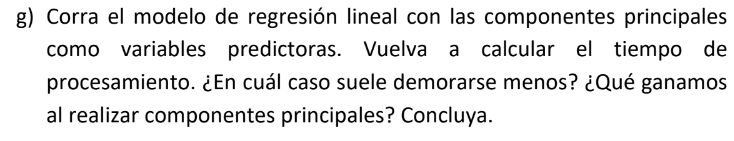

In [21]:
# obtener componentes principales con PCA
pca = PCA(n_components = 12)
pca.fit(df_estandarizado)

# transformar datos con componentes principales
df_pca = pca.transform(df_estandarizado)

# generar modelo de regresión lineal múltiple y entrenarlo
X_train, X_test, y_train, y_test = train_test_split(df_pca, df['SalePrice'], test_size = 0.2, random_state = 42)

In [22]:
# Empezar cronometro
start2=datetime.now()

In [23]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

LinearRegression()

In [24]:
# finalizar cronometro
tiempo_ejecucion2 = datetime.now()-start2 #esto entrega el tiempo que demoró en correr el modelo.
print("Tiempo de ejecución del modelo con PCA: ", tiempo_ejecucion2)

Tiempo de ejecución del modelo con PCA:  0:00:00.059642


In [25]:
# predecir valores de test
y_pred = regresion_lineal.predict(X_test)

# calcular r2 y MSE
print('r2: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

r2:  0.7517839446445564
MSE:  1903898114.437469


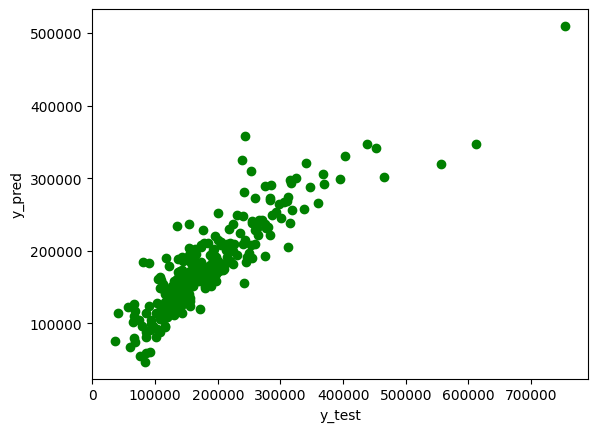

In [26]:
# graficar y_test vs y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [27]:
# ver tiempos de ejecución de ambos modelos
print("Tiempo de ejecución del modelo sin PCA: ", tiempo_ejecucion)
print("Tiempo de ejecución del modelo con PCA: ", tiempo_ejecucion2)

Tiempo de ejecución del modelo sin PCA:  0:00:00.092878
Tiempo de ejecución del modelo con PCA:  0:00:00.059642


In [28]:
# Teóricamente PCA debe demorar menos que al realizar la regresión con todas las variables, ya que PCA reduce la dimensionalidad de los datos por lo que 
# el entrenamiento del modelo se debiese realziar de manera mucho más rápida si utilizamos set con muchos datos.

# En este caso particular el set de dato tiene pocos registros por lo que la diferencia en los tiempos de ejecución es muy pequeña y no alcanza a ser significativa.
# Pero para una mayor cantidad de datos los tiempos de ejecución sería mas eficiente con PCA.